# Completion:
- Practice identifying which supervised and unsupervised learning techniques are best suited for your Capstone Project data.  
- Utilize supervised and unsupervised learning techniques to build predictive models.
- Understand how to identify the best model.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy
import pandas.util.testing as tm

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
filename = "kc_house_data.csv"
df = pd.read_csv(filename)

In [6]:
sns.set_style(style = 'whitegrid')

In [7]:
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [10]:
def plot_barh(data,column):
    return sns.countplot(y=column, data=df, palette="icefire")
def plot_bar(data,column):
    return sns.countplot(x=column, data=df, palette="icefire")
def plot_swarm(df,x,y):
    return sns.swarmplot(x=x, y=y, data=df, palette="icefire")
def plot_lm(df,x,y):
    return sns.lmplot(x=x, y=y, data=df,palette="icefire")
def plot_scatter(df,x,y,hue):
    return sns.scatterplot(data=df, x=x, y=y,hue=hue, palette="icefire")
def get_corrmat(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(15, 10))
    ax = sns.heatmap(
    correlation_matrix,
    vmax=1,
    square=True,
    annot=True,
    fmt='.2f',
    cmap='GnBu',
    cbar_kws={"shrink": .5},
    robust=True)
    plt.title('Correlation Matrix of features', fontsize=8)
    plt.show()

In [13]:
def regression_eval(y_true,y_pred):
    variance_score= metrics.explained_variance_score(y_true, y_pred)
    mse= np.sqrt(metrics.mean_squared_error(y_true, y_pred))
    r2= metrics.r2_score(y_true, y_pred)
    return print(f'Varianace score (Best possible score is 1.0, lower values are worse.) : {variance_score}\nrmse : {mse}\nR2 (Best possible score is 1.0): {r2}')

In [14]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

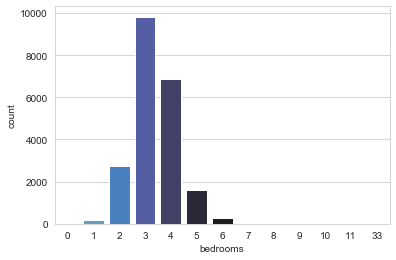

In [15]:
plot_bar(df,df['bedrooms'])

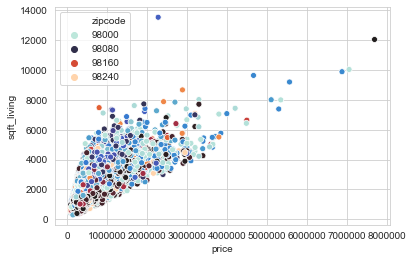

In [16]:
plot_scatter(df,df.price,df.sqft_living,df.zipcode)

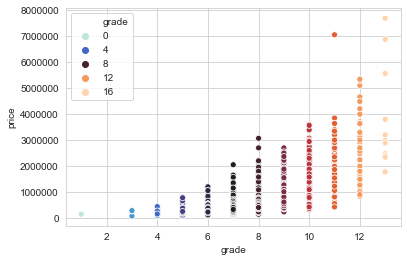

In [17]:
plot_scatter(df,df.grade,df.price,df.grade)

In [18]:
X = df.drop(['id','date'], axis=1)
Y = df['price'].copy()
Y = pd.DataFrame(Y)

In [19]:
X.corr()['price']

price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

In [20]:
X.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

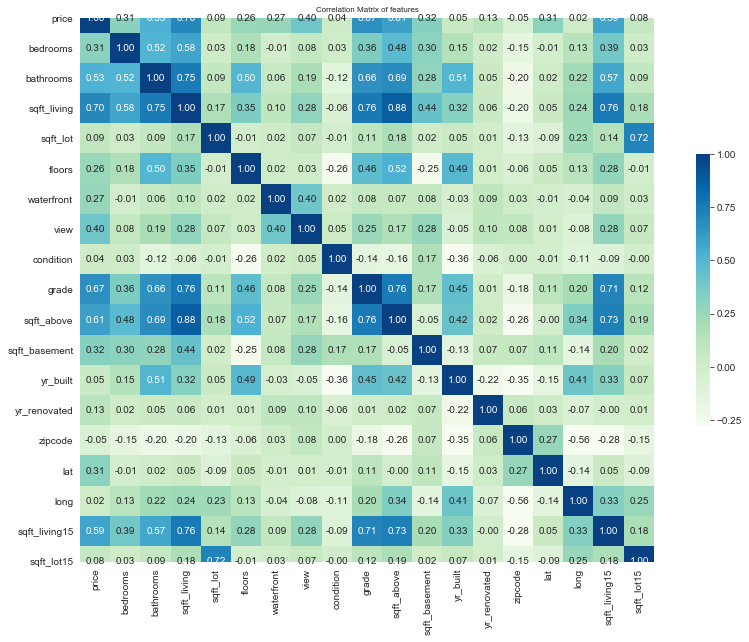

In [21]:
get_corrmat(X)

In [22]:
X = X.drop('price', axis = 1)

## XGBoost

In [23]:
import xgboost
from sklearn import metrics

In [24]:
model = xgboost.XGBRegressor(n_estimators = 50, learning_rate = 0.4, max_depth = 7)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

In [26]:
print(f'Train dataset has {X_train.shape[0]} rows & {X_train.shape[1]} columns')
print(f'Train dataset has {X_test.shape[0]} rows & {X_test.shape[1]} columns')

Train dataset has 14480 rows & 18 columns
Train dataset has 7133 rows & 18 columns


In [27]:
model= xgboost.XGBRegressor(n_estimators = 900, learning_rate = 0.05, max_depth = 5)
model.fit(X_train,y_train)
pred= model.predict(X_test)
regression_eval(y_test,pred)

Varianace score (Best possible score is 1.0, lower values are worse.) : 0.8844888679577133
rmse : 131517.9039042473
R2 (Best possible score is 1.0): 0.8844800613889098


## Random Forest

In [28]:
filename = "kc_house_data.csv"
df = pd.read_csv(filename)

In [29]:
df["date"]=pd.to_datetime(df["date"])
df["year"]=df["date"].apply(lambda date: date.year)
df["month"]=df["date"].apply(lambda date: date. month)
df.drop("date", axis=1, inplace=True)
df.drop("zipcode", axis = 1, inplace=True)
def renovation(feature):
    if feature > 0:
        feature=1
    return feature
df["yr_renovated"] = df["yr_renovated"].apply(renovation)

df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1,47.7210,-122.319,1690,7639,2014,12
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [30]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [32]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [33]:
y_pred = regressor.predict(X_test)

In [34]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.32305158203896067

In [35]:
regressor = RandomForestRegressor(n_estimators = 5, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [36]:
y_pred = regressor.predict(X_test)

In [37]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.27166936680438114

## Linear Regression

In [39]:
filename = "kc_house_data.csv"
df = pd.read_csv(filename)

In [41]:
x = df[['sqft_living']]
y = df[['price']]

In [43]:
from sklearn.linear_model import LinearRegression
# Splitting the different X and Y into train groups and tests groups respectively
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=1/3, random_state=0)

# Making use of the LinearRegression library and all of its calculations
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0.5, 1.0, 'SqFt Living vs Price (Train set)')

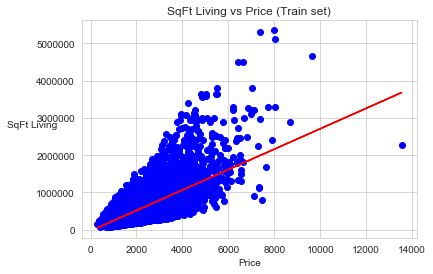

In [44]:
plt.scatter(X_train,y_train,color = 'blue')
plt.plot(X_train,lin_reg.predict(X_train),color = 'red')
plt.xlabel('Price')
plt.ylabel('SqFt Living',rotation = 0)
plt.title("SqFt Living vs Price (Train set)")

Text(0.5, 1.0, 'SqFt Living vs Price (Test set)')

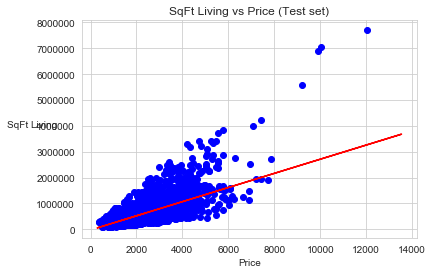

In [45]:
plt.scatter(X_test,y_test,color = 'blue')
plt.plot(X_train,lin_reg.predict(X_train),color = 'red')
plt.xlabel('Price')
plt.ylabel('SqFt Living',rotation = 0)
plt.title("SqFt Living vs Price (Test set)")

In [46]:
r2_score(y_test, lin_reg.predict(X_test))  

0.5000063123558642